#  2020AIML544 - CLASSIFICATION - ASSIGNMENT2
##  LIVER DISEASE PREDICTION

## Overall Approach

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK THE STATISTICS OF DATA USING DESCRIBE FUNCTION
    3. CHECK FOR DUPLICATE ROWS & NULL VALUES 
    4. CHANGE TO APPROPRIATE DATATYPES    
    5. SCATTERPLOTS & PAIRPLOTS OF ATTRIBUTES
    6. HEATMAP TO SHOW CORRELATION
    7. HISTOGRAMS TO CHECK DISTRIBUTION & SKEWNESS 
    8. BOXPLOTS TO CHECK OUTLIERS
    9. OULIER DETECTION AND HANDLING USING IQR METHOD
    10. SCALING OF DATA USING STANDARDSCALER

### MODEL BUILDING:
    1. BUILD GAUSSIAN NAIVE BAYES CLASSIFIER
    2. FIND ACCURACY SCORE
    3. BUILD LOGISTIC REGRESSION MODEL
    4. FIND ACCURACY SCORE
    
### MODEL PERFORMANCE ANALYSIS:
    1. BUILD MODEL USING SKLEARN NAIVE BAYES & LOGISTIC REGRESSION LIBRARES
    2. FIND ACCURACY SCORES
    3. CROSS VALIDATION USING GRIDSEARCHCV FOR NAIVE BAYES
    4. DETERMINE THE BEST MODEL   

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections 

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <span style='color: darkblue'>Task 1: EXPLORATORY DATA ANALYSIS </span>

#### Read the input excel file into a dataframe

In [2]:
file_path = r"C:\Users\Aspire V3-572\Desktop\AIML Mini Project\Classification\liver_disease_1.CSV"

df = pd.read_csv(file_path,header=0)

#### Display information about the dataframe using head function

In [3]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


#### Check the number of records in the dataset using shape function

In [4]:
df.shape

(583, 10)

There are 768 records and 9 attributes in the dataset.

Let's take a quick look at the columns

In [5]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#### Check the statistics of numerical attributes using describe function

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


<span style='background : yellow' > **Observation:**   </span> This is the statistical summary of the data. We can observe the mean, standard deviation, minimum and maximum values of all the numerical attributes

### <span style='color: Black'>Data Cleaning </span>

<b>
Checking for duplicate rows
</b>

<span style='background : yellow' > **Observation:**   </span>
* There are 26 duplicate rows in our dataset, we will keep the first occurence and remove the duplicate occurences

In [7]:
dv = df.duplicated(keep=False)
dv.sum()

26

In [8]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
len(df)

570

### <span style='color: Black'>Missing Values Imputation </span>

<span style='background : yellow' > **Observation:**   </span> 
* There are 4 Null values in Albumin_and_Globulin_Ratio attribute. 
* Hence I am going to impute the zeroes in these attributes with the mean value of the column as both mean & median are very close. 

In [10]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
#Replacing all nan's with mean of the respective column
df=df.fillna(df.mean())

df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<b>
Check the quality of the data and data types of each column using info function
</b>

<span style='background : yellow' > **Observation:**   </span>

The datatypes are appropriate for input attributes. We need to convert the datatype of output to integer. 

Before that, we need to replace the 'Yes' & 'No' values in output column to numerical values as well.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            570 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    int64  
 4   Alamine_Aminotransferase    570 non-null    int64  
 5   Aspartate_Aminotransferase  570 non-null    int64  
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  570 non-null    float64
 9   Dataset                     570 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 49.0+ KB


In [13]:
df['Dataset'].replace('Yes', '1', inplace= True)
df['Dataset'].replace('No', '0', inplace= True)

In [14]:
df.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [15]:
df['Dataset'] = df['Dataset'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            570 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    int64  
 4   Alamine_Aminotransferase    570 non-null    int64  
 5   Aspartate_Aminotransferase  570 non-null    int64  
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  570 non-null    float64
 9   Dataset                     570 non-null    int32  
dtypes: float64(5), int32(1), int64(4)
memory usage: 46.8 KB


### Pairplots 
#### To visualize the relationship between attributes

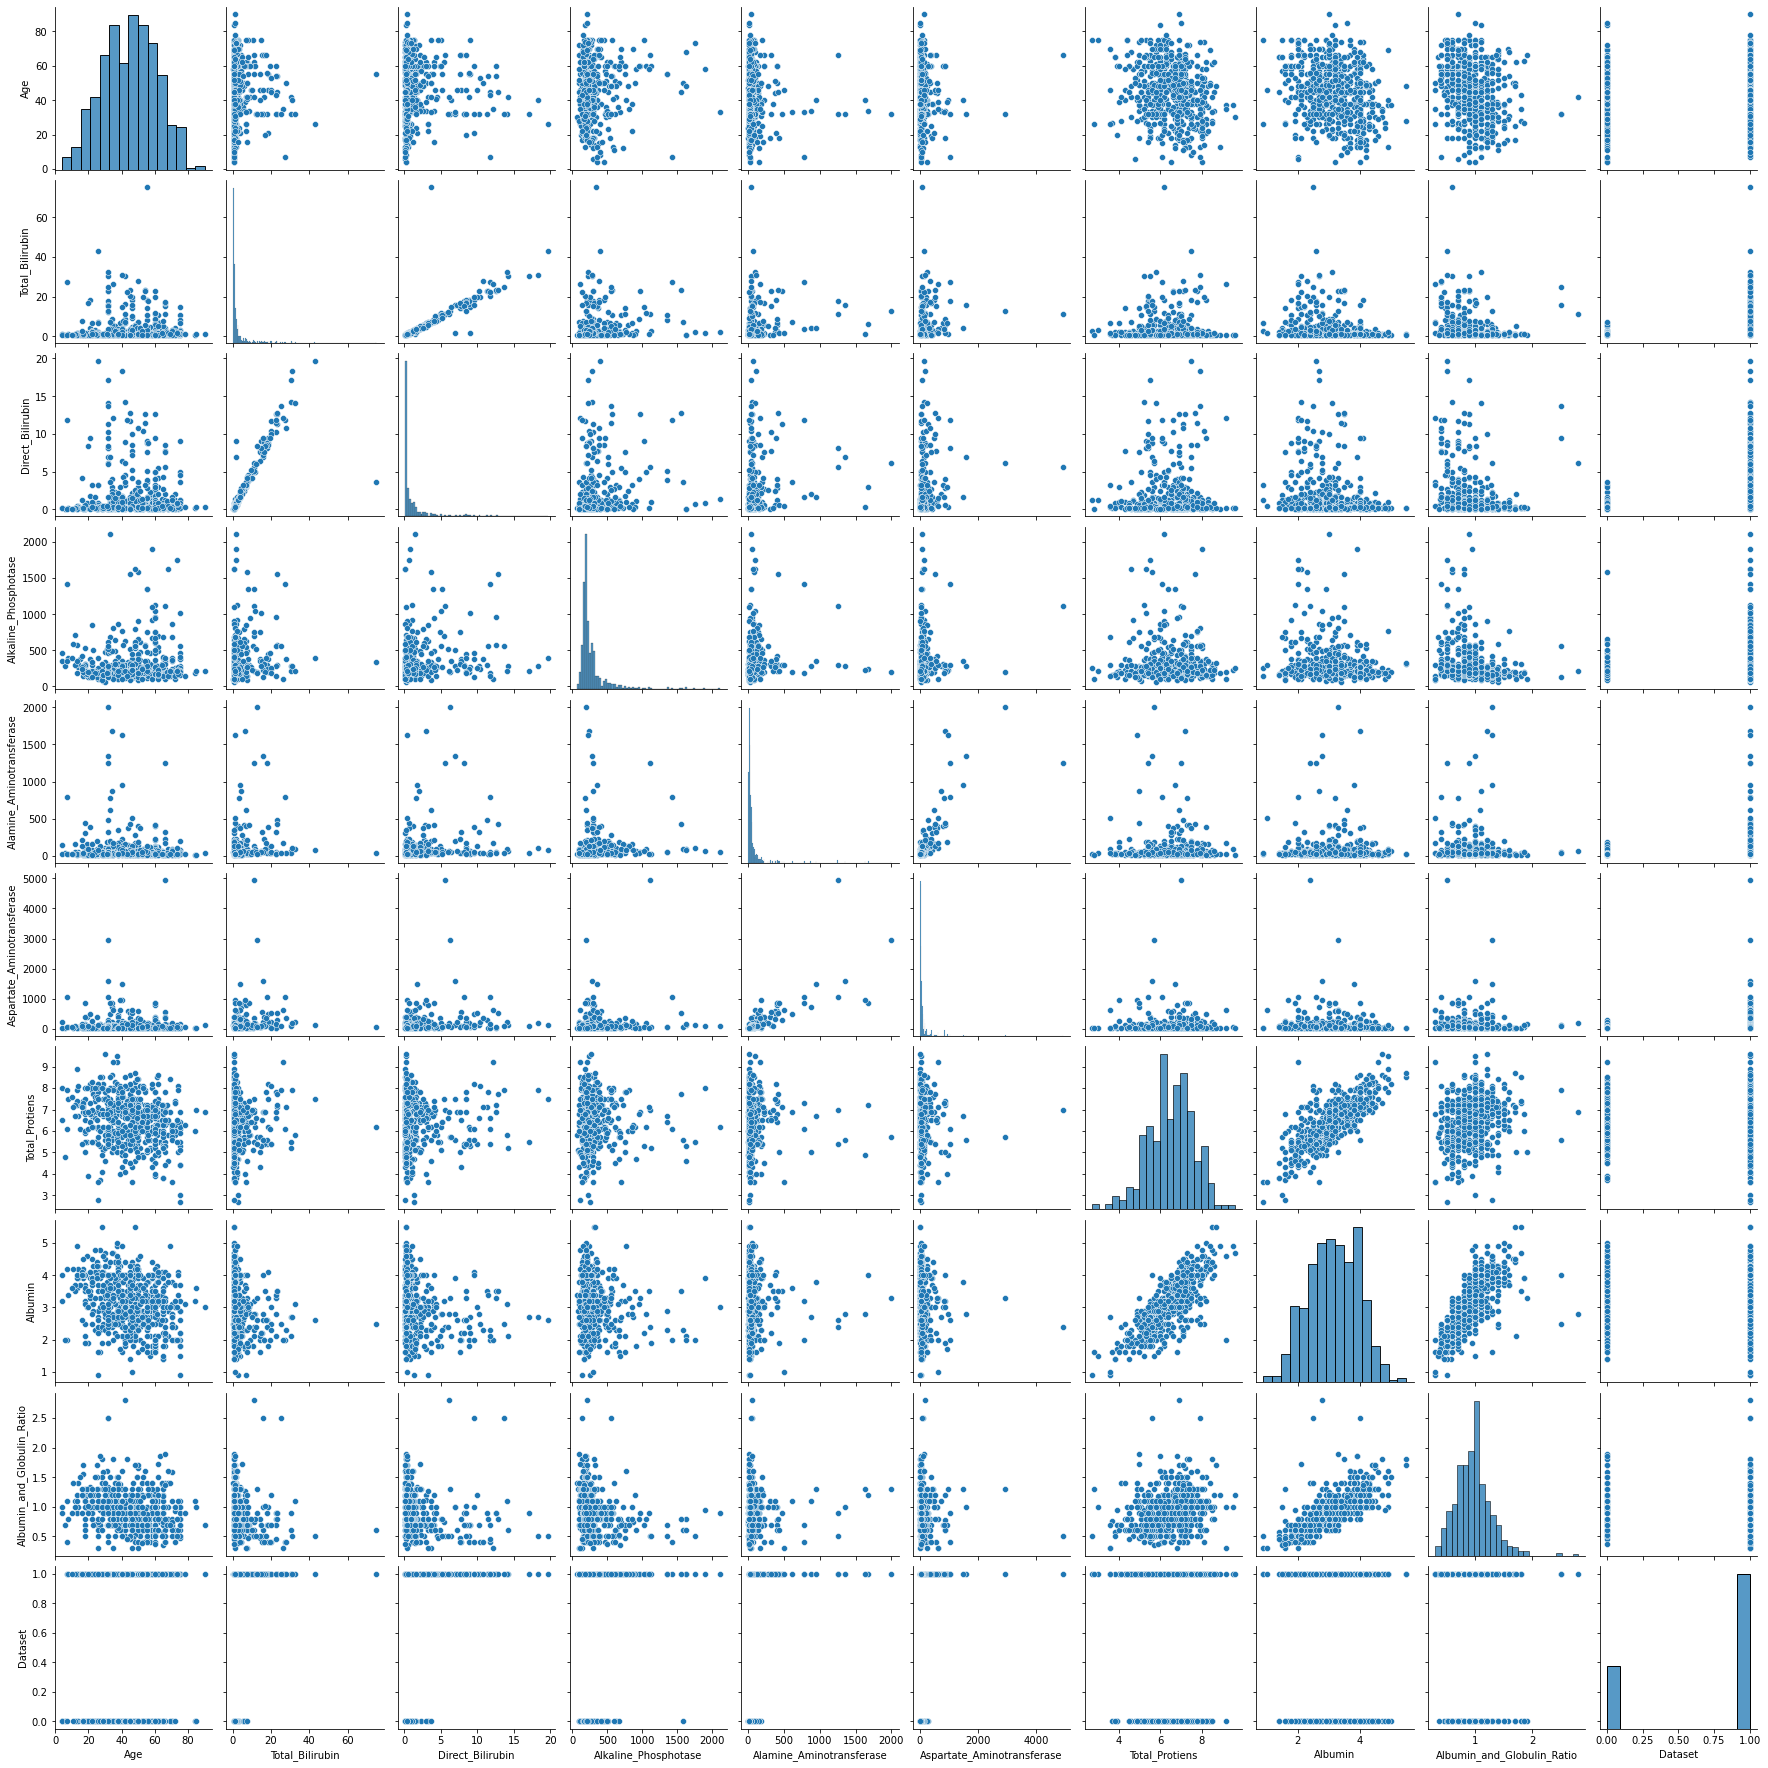

In [16]:
sns.pairplot(df)

### ScatterPlots
#### I am just plotting scatterplots to take a close look at the relationship of attributes with the outcome

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Dataset'>

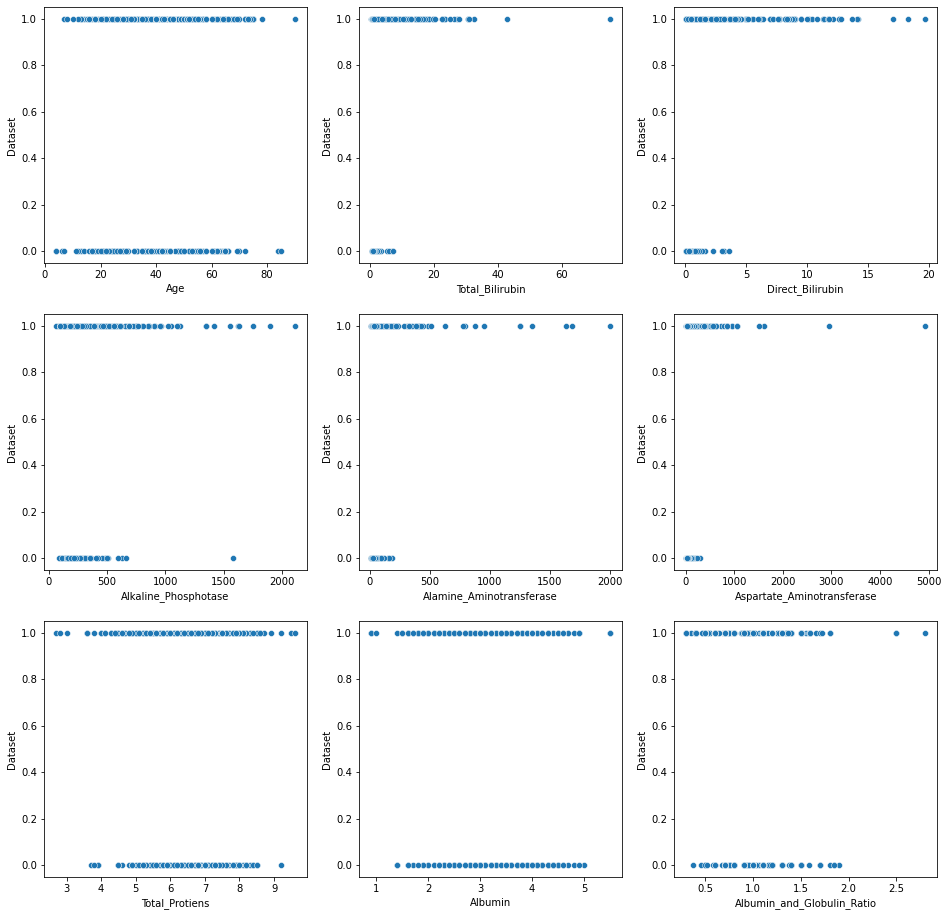

In [17]:
fig, axes = plt.subplots(3,3, figsize=(16,16))

sns.scatterplot(x=df.Age, y=df.Dataset, data=df, ax=axes[0,0])
sns.scatterplot(x=df.Total_Bilirubin, y=df.Dataset, data=df, ax=axes[0,1])
sns.scatterplot(x=df.Direct_Bilirubin, y=df.Dataset, data=df, ax=axes[0,2])
sns.scatterplot(x=df.Alkaline_Phosphotase, y=df.Dataset, data=df, ax=axes[1,0])
sns.scatterplot(x=df.Alamine_Aminotransferase, y=df.Dataset, data=df, ax=axes[1,1])
sns.scatterplot(x=df.Aspartate_Aminotransferase, y=df.Dataset, data=df, ax=axes[1,2])
sns.scatterplot(x=df.Total_Protiens, y=df.Dataset, data=df, ax=axes[2,0])
sns.scatterplot(x=df.Albumin, y=df.Dataset, data=df, ax=axes[2,1])
sns.scatterplot(x=df.Albumin_and_Globulin_Ratio, y=df.Dataset, data=df, ax=axes[2,2])

### HeatMap

<span style='background : yellow' > **Observation:**   </span>
Total_Bilurubin & DIrect_Bilurubin attributes seem to have some correlation to Output (Dataset variable). 
Similarly, Age has some correlation with Albumin & Albumin_and_Globulin_Ratio attributes. 

Total_Bilurubin & DIrect_Bilurubin has good correlation with each other. Similary Total_Proteins & Albumin has good correlation with each other. Also, Alamine_Aminotransferase & Aspartate_Aminotransferase also have good correlation with each other. We could use only either of these. However, I am going to consider all the attributes for the purpose of this assignment. 

<AxesSubplot:>

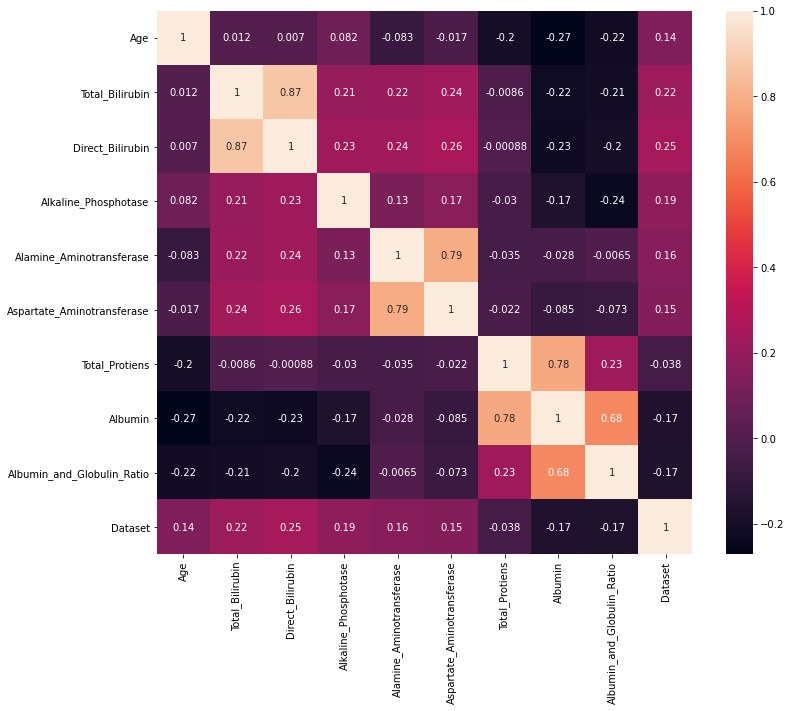

In [18]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

### Checking distribution & Skewness - Histogram
 <span style='background : yellow' > **Observation:**   </span>
 
Some of the attributes seem to be right skewed. These will be taken care with outlier removal & scaling of data. 

[Text(0.5, 1.0, 'histogram of Albumin_and_Globulin_Ratio')]

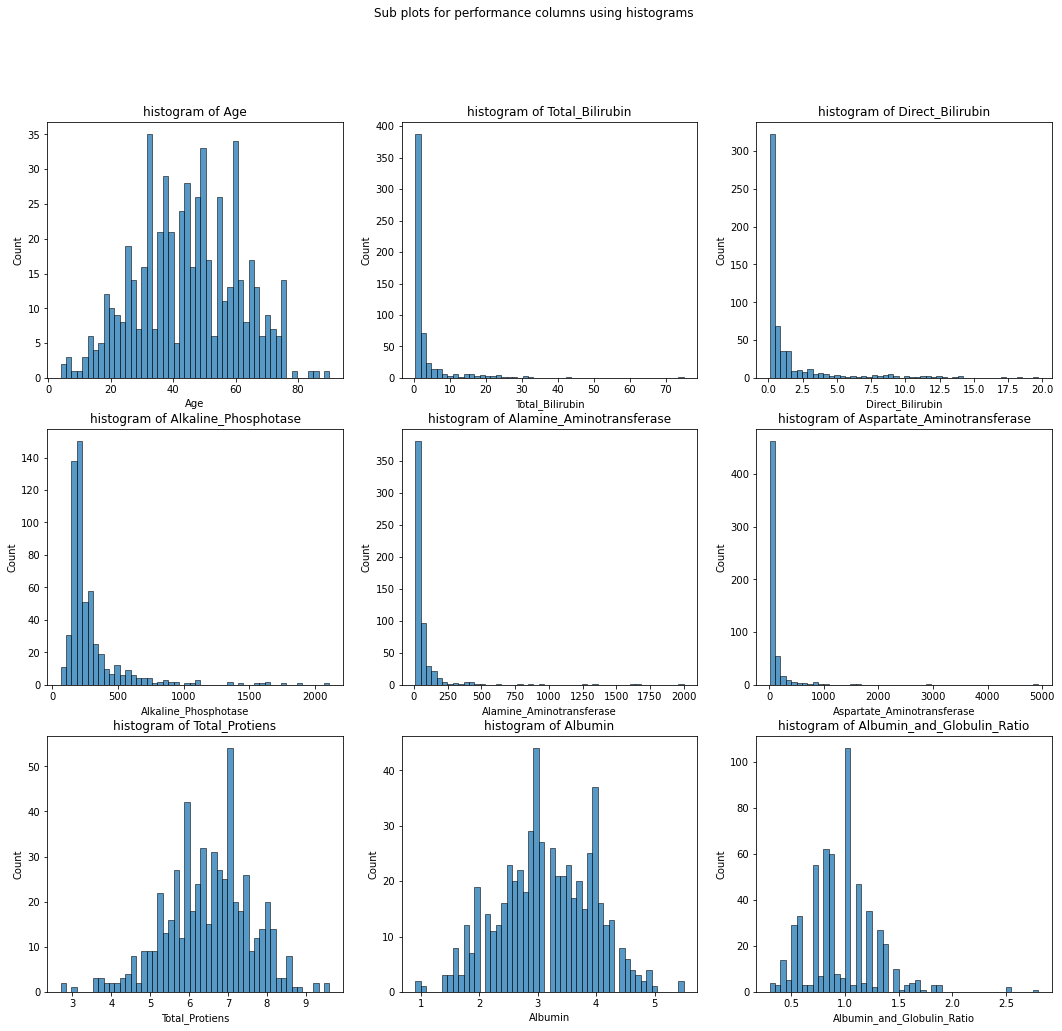

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Sub plots for performance columns using histograms')
sns.histplot(ax=axes[0, 0],data=df,x='Age',bins=50).set(title="histogram of Age")
sns.histplot(ax=axes[0, 1],data=df,x='Total_Bilirubin',bins=50).set(title="histogram of Total_Bilirubin")
sns.histplot(ax=axes[0, 2],data=df,x='Direct_Bilirubin',bins=50).set(title="histogram of Direct_Bilirubin")
sns.histplot(ax=axes[1, 0],data=df,x='Alkaline_Phosphotase',bins=50).set(title="histogram of Alkaline_Phosphotase")
sns.histplot(ax=axes[1, 1],data=df,x='Alamine_Aminotransferase',bins=50).set(title="histogram of Alamine_Aminotransferase")
sns.histplot(ax=axes[1, 2],data=df,x='Aspartate_Aminotransferase',bins=50).set(title="histogram of Aspartate_Aminotransferase")
sns.histplot(ax=axes[2, 0],data=df,x='Total_Protiens',bins=50).set(title="histogram of Total_Protiens")
sns.histplot(ax=axes[2, 1],data=df,x='Albumin',bins=50).set(title="histogram of Albumin")
sns.histplot(ax=axes[2, 2],data=df,x='Albumin_and_Globulin_Ratio',bins=50).set(title="histogram of Albumin_and_Globulin_Ratio")

<span style='color:Black'>
<b>

BOX PLOT FOR BETTER UNDERSTANDING OF DATA DISTRIBUTION AND OUTLIER DETECTION 
</b>
</span>


[Text(0.5, 1.0, 'boxplot of Albumin_and_Globulin_Ratio')]

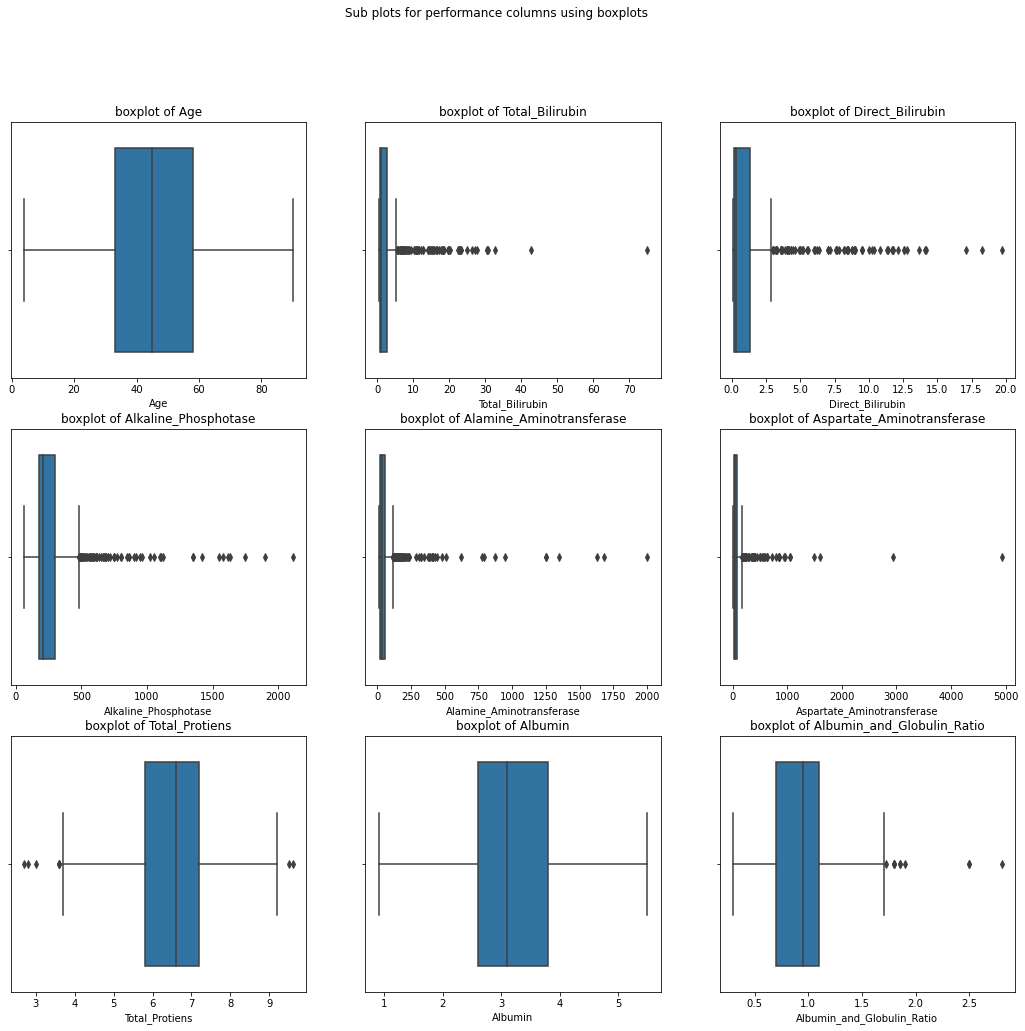

In [20]:
#Now lets do boxplots for all the columns for better understanding of outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0, 0],data=df,x='Age').set(title="boxplot of Age")
sns.boxplot(ax=axes[0, 1],data=df,x='Total_Bilirubin').set(title="boxplot of Total_Bilirubin")
sns.boxplot(ax=axes[0, 2],data=df,x='Direct_Bilirubin').set(title="boxplot of Direct_Bilirubin")
sns.boxplot(ax=axes[1, 0],data=df,x='Alkaline_Phosphotase').set(title="boxplot of Alkaline_Phosphotase")
sns.boxplot(ax=axes[1, 1],data=df,x='Alamine_Aminotransferase').set(title="boxplot of Alamine_Aminotransferase")
sns.boxplot(ax=axes[1, 2],data=df,x='Aspartate_Aminotransferase').set(title="boxplot of Aspartate_Aminotransferase")
sns.boxplot(ax=axes[2, 0],data=df,x='Total_Protiens').set(title="boxplot of Total_Protiens")
sns.boxplot(ax=axes[2, 1],data=df,x='Albumin').set(title="boxplot of Albumin")
sns.boxplot(ax=axes[2, 2],data=df,x='Albumin_and_Globulin_Ratio').set(title="boxplot of Albumin_and_Globulin_Ratio")

#### OUTLIER TREATMENT USING IQR METHOD

In [21]:
df1 = df.copy()

for col in df1.columns:
    if col != 'Dataset':
        Q1  = df1[col].quantile(0.25) 
        Q3  = df1[col].quantile(0.75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
    
        df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
        df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])
        #replacing all outliers above upper bound by upper bound and below lower bound by lower bound values

[Text(0.5, 1.0, 'boxplot of Albumin_and_Globulin_Ratio')]

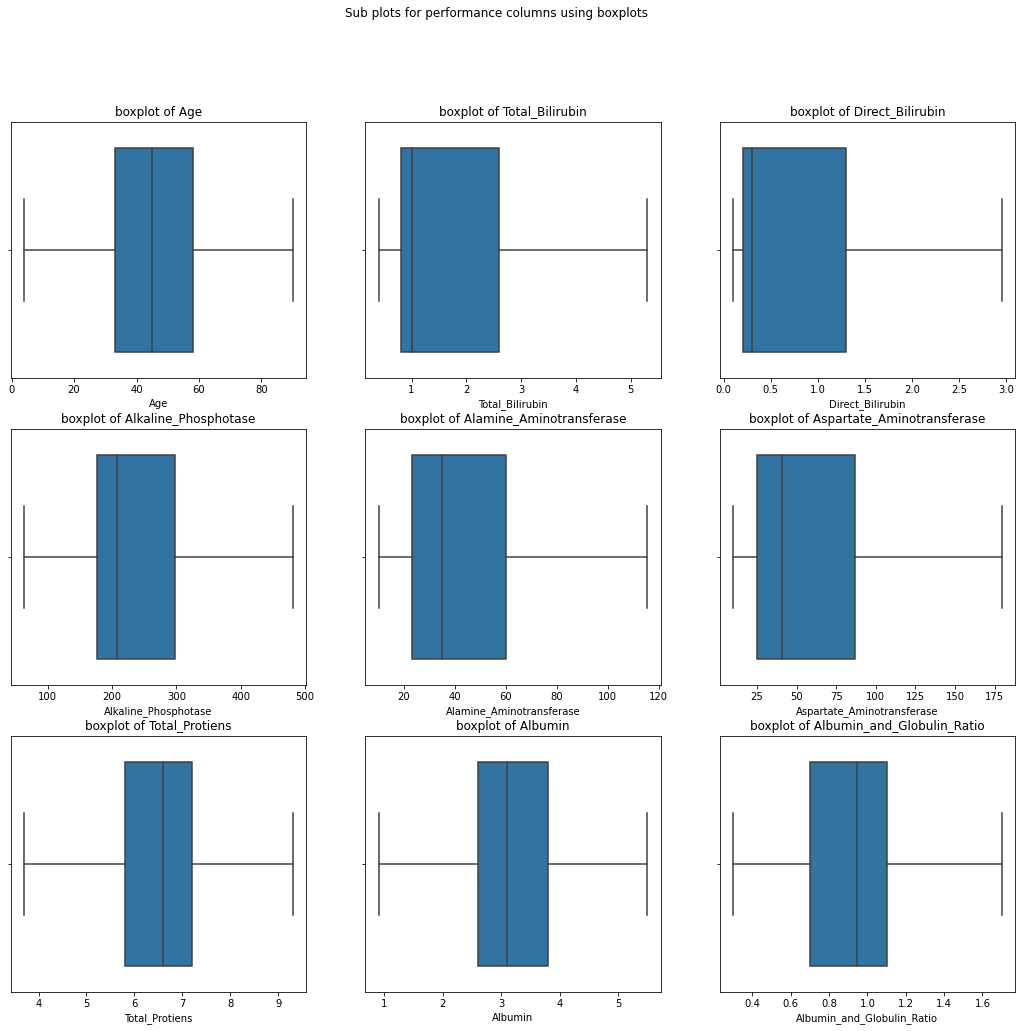

In [22]:
#Now lets do boxplots for all the columns for better understanding of outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0, 0],data=df1,x='Age').set(title="boxplot of Age")
sns.boxplot(ax=axes[0, 1],data=df1,x='Total_Bilirubin').set(title="boxplot of Total_Bilirubin")
sns.boxplot(ax=axes[0, 2],data=df1,x='Direct_Bilirubin').set(title="boxplot of Direct_Bilirubin")
sns.boxplot(ax=axes[1, 0],data=df1,x='Alkaline_Phosphotase').set(title="boxplot of Alkaline_Phosphotase")
sns.boxplot(ax=axes[1, 1],data=df1,x='Alamine_Aminotransferase').set(title="boxplot of Alamine_Aminotransferase")
sns.boxplot(ax=axes[1, 2],data=df1,x='Aspartate_Aminotransferase').set(title="boxplot of Aspartate_Aminotransferase")
sns.boxplot(ax=axes[2, 0],data=df1,x='Total_Protiens').set(title="boxplot of Total_Protiens")
sns.boxplot(ax=axes[2, 1],data=df1,x='Albumin').set(title="boxplot of Albumin")
sns.boxplot(ax=axes[2, 2],data=df1,x='Albumin_and_Globulin_Ratio').set(title="boxplot of Albumin_and_Globulin_Ratio")

### SPLITTING DATA AND SCALING DATA FOR NORMALIZATION

#### <span style='color:Black'> Now lets start to prepare our data for Modeling. For this, I am going to split the data into 80:20 for traindata:testdata
    
#### Tried 70:30 & 60:40 split ratios however 80:20 gives better accuracy scores. Before splitting I'll scale the data using Standard Scaler. 
#### StandardScaler follows Standard Normal Distribution. Therefore, it makes mean = 0 and scales the data to unit variance.
</span>

In [23]:
scaler = StandardScaler()
X = df1[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]

X = np.array(X)
X = scaler.fit_transform(X)

y = df1["Dataset"]
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y) 

## <span style='color: darkblue'>Task 2: IMPLEMENT NAIVE BAYES CLASSIFIER </span>

In [24]:
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

In [25]:
def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    
#     print('bincount(y)', np.bincount(y))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0] - n_0) - 1))
    return m, v # mean and variance

In [26]:
def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            product = product * (1/math.sqrt(2*3.14*v[i][j])) * math.exp(-0.5
                                 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

In [27]:
def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
        
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

In [28]:
score = 0
length = len(X_test)
y_pred = np.ones(length,dtype=int)
for i in range(0, length):
    m, v, pre_probab, pfc, pcf, prediction = GNB(X_train, y_train, X_test[i])
    y_pred[i] = prediction
    print('prediction', y_pred[i]) # Output given below............(final prediction)
    answer = y_test[i]
    if prediction == answer:
           score += 1
my_NB_score = float(score) / float(length)
print ('Your score: ', my_NB_score)

prediction 0
prediction 0
prediction 1
prediction 0
prediction 0
prediction 0
prediction 1
prediction 1
prediction 1
prediction 1
prediction 1
prediction 0
prediction 1
prediction 1
prediction 0
prediction 1
prediction 0
prediction 1
prediction 1
prediction 0
prediction 0
prediction 1
prediction 0
prediction 1
prediction 0
prediction 0
prediction 0
prediction 1
prediction 0
prediction 1
prediction 1
prediction 1
prediction 1
prediction 0
prediction 1
prediction 1
prediction 1
prediction 1
prediction 0
prediction 0
prediction 0
prediction 0
prediction 0
prediction 1
prediction 0
prediction 0
prediction 1
prediction 1
prediction 1
prediction 1
prediction 1
prediction 1
prediction 0
prediction 1
prediction 1
prediction 0
prediction 1
prediction 0
prediction 1
prediction 1
prediction 0
prediction 0
prediction 1
prediction 0
prediction 1
prediction 0
prediction 1
prediction 0
prediction 1
prediction 1
prediction 1
prediction 1
prediction 0
prediction 1
prediction 1
prediction 0
prediction 0

#### ACCURACY MEASURES FOR 'GAUSSIAN NAIVE BAYES':

In [29]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,30,3,33
1,27,54,81
All,57,57,114


In [30]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : %.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall   : %.2f' % recall)
# f1: (2 * (precision * recall) ) / (precision + recall)
f1 = f1_score(y_test, y_pred, average=None)
f1_round = [round(num, 2) for num in f1]
print('F1 score for class 0 & class 1:', f1_round)

Accuracy : 0.74
Precision: 0.95
Recall   : 0.67
F1 score for class 0 & class 1: [0.67, 0.78]


Let's check the score using scikit GaussianNB library

#### USING SKLEARN LIBRARY:

In [31]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
scikit_NB_score = clf.score(X_test,y_test)
y_pred_sk = clf.predict(X_test)
print ('scikit prediction:', y_pred_sk)
print ('score Scikit learn: ', scikit_NB_score)

scikit prediction: [0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1
 0 1 1]
score Scikit learn:  0.7368421052631579


#### CROSS VALIDATION USING GRIDSEARCHCV

In [32]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
params = {}

#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=30)

nb2 = GridSearchCV(GaussianNB(), cv=skf, param_grid=params)
nb2.fit(X_train, y_train)

# predict values on the test set
y_pred_nb2 = nb2.predict(X_test) 

GridSearch_NB_score = nb2.score(X_test, y_test)
print ('score GridSearchCV: ', GridSearch_NB_score)

score GridSearchCV:  0.7368421052631579


## <span style='color: darkblue'>Task 3: IMPLEMENT LOGISTIC REGRESSION </span>

In [33]:
##The sigmoid function adjusts the cost function hypotheses to adjust the algorithm proportionally for worse estimations
def Sigmoid(z):
     G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
     return G_of_Z

In [34]:
##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i] 
##This hypothesis will be used to calculate each instance of the Cost Function
def Hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

In [35]:
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    return J

In [36]:
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

In [37]:
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

In [38]:
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            cost = Cost_Function(X,Y,theta,m)
#             print ('theta ', theta)
            print ('cost is ', cost)
    return theta

In [39]:
# These are the initial guesses for theta as well as the learning rate of the algorithm
# A learning rate too low will not close in on the most accurate values within a reasonable number of iterations
# An alpha too high might overshoot the accurate values or cause irratic guesses
# Each iteration increases model accuracy but with diminishing returns, 
# and takes a signficicant coefficient times O(n)*|Theta|, n = dataset length
initial_theta = [0,0,0,0,0,0,0,0,0]
alpha = 0.01
iterations = 200
theta = Logistic_Regression(X_train,y_train,alpha,initial_theta,iterations)
print ('theta ', theta)

cost is  0.692364976779776
cost is  0.6530715975862259
theta  [0.08335094630320634, 0.11811320401059315, 0.1192570450510191, 0.09163456107529988, 0.12775115531137385, 0.13557489461126104, 0.021775014164348967, -0.042914794640624844, -0.06438367028327242]


In [40]:
score = 0
length = len(X_test)
y_pred = np.ones(length,dtype=int)
for i in range(length):
    prediction = round(Hypothesis(X_test[i],theta))
    y_pred[i] = prediction
    print("predict",y_pred[i])
    answer = y_test[i]
    if prediction == answer:
        score += 1
    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
my_LR_score = float(score) / float(length)
    
print ('Your score: ', my_LR_score)

predict 0
predict 0
predict 1
predict 0
predict 0
predict 0
predict 1
predict 1
predict 1
predict 1
predict 1
predict 0
predict 1
predict 1
predict 0
predict 0
predict 0
predict 1
predict 1
predict 0
predict 0
predict 1
predict 0
predict 1
predict 0
predict 0
predict 0
predict 1
predict 0
predict 1
predict 1
predict 1
predict 1
predict 0
predict 1
predict 1
predict 0
predict 1
predict 0
predict 0
predict 0
predict 0
predict 0
predict 1
predict 0
predict 0
predict 0
predict 1
predict 1
predict 1
predict 1
predict 1
predict 0
predict 1
predict 1
predict 0
predict 1
predict 0
predict 1
predict 1
predict 0
predict 0
predict 1
predict 0
predict 1
predict 0
predict 1
predict 0
predict 1
predict 1
predict 1
predict 1
predict 0
predict 1
predict 1
predict 0
predict 1
predict 0
predict 0
predict 0
predict 0
predict 1
predict 0
predict 0
predict 0
predict 0
predict 1
predict 1
predict 0
predict 1
predict 1
predict 1
predict 0
predict 0
predict 0
predict 0
predict 1
predict 0
predict 0
predict 0


#### ACCURACY MEASURES FOR 'LOGISTIC REGRESSION':

In [41]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,30,3,33
1,29,52,81
All,59,55,114


In [42]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : %.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall   : %.2f' % recall)
# f1: (2 * (precision * recall) ) / (precision + recall)
f1 = f1_score(y_test, y_pred, average=None)
f1_round = [round(num, 2) for num in f1]
print('F1 score for class 0 & class 1:', f1_round)

Accuracy : 0.72
Precision: 0.95
Recall   : 0.64
F1 score for class 0 & class 1: [0.65, 0.76]


#### USING SKLEARN LIBRARY:

Let's check the score using scikit LogisticRegression library

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
scikit_LR_score = clf.score(X_test,y_test)
y_pred_sk = clf.predict(X_test)
print ('scikit prediction:', y_pred_sk)
print('score Scikit learn:', scikit_LR_score)

scikit prediction: [0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1]
score Scikit learn: 0.7280701754385965


### DETERMINE THE WINNER !!

In [44]:
if my_LR_score > my_NB_score:
    print ('Logistic Regression Model WON..!')
elif my_LR_score == my_NB_score:
    print ('Its a TIE!')
else:
    print( 'Naive Bayes Model WON..!')

Naive Bayes Model WON..!


### CONCLUSION: 

            Naive Bayes Score                : 0.7368421052631579
            Naive Bayes scikit Score         : 0.7368421052631579
            Logistic Regression Score        : 0.7192982456140351
            Logistic Regression scikit Score : 0.7280701754385965

#### Comparing the Accuracy & F1 scores, we can conclude that "NAIVE BAYES" is better suitable Model for the Liver Disease Prediction Data. This is subject to change in case feature subset selection methods were used.